In [40]:
o2=[{'temp':100,'Density':3.945,'Cp':0.962,'Vis':76.4,'kyn_vis':1.94,'conductivity':9.25,'diff':2.44,'Pr':0.796,},
{'temp':150,'Density':2.585,'Cp':0.921,'Vis':114.8,'kyn_vis':4.44,'conductivity':13.8,'diff':5.80,'Pr':0.766,},
{'temp':200,'Density':1.930,'Cp':0.915,'Vis':147.5,'kyn_vis':7.64,'conductivity':18.3,'diff':10.4,'Pr':0.737,},
{'temp':250,'Density':1.542,'Cp':0.915,'Vis':178.6,'kyn_vis':11.58,'conductivity':22.6,'diff':16.0,'Pr':0.723,},
{'temp':300,'Density':1.284,'Cp':0.920,'Vis':207.2,'kyn_vis':16.14,'conductivity':26.8,'diff':22.7,'Pr':0.711,}]

import pandas as pd
df=pd.DataFrame(o2)

In [50]:

df['temp']=df.astype('float')

ValueError: Columns must be same length as key

In [42]:

df.head()


,temp,Density,Cp,Vis,kyn_vis,conductivity,diff,Pr
0,100.0,3.945,0.962,76.4,1.94,9.25,2.44,0.796
1,150.0,2.585,0.921,114.8,4.44,13.80,5.80,0.766
2,200.0,1.930,0.915,147.5,7.64,18.30,10.40,0.737
3,250.0,1.542,0.915,178.6,11.58,22.60,16.00,0.723
4,300.0,1.284,0.920,207.2,16.14,26.80,22.70,0.711


In [53]:
df.loc[(df['temp']==100
        )]['Vis'].to_list()


[76.4]

In [7]:
import json

with open("./Properties_table.json",encoding="UTF-8",mode="r") as file:
    data= json.load(file)

data

{'co': [{'temp': 200,
   'Density': 1.6888,
   'Cp': 1.045,
   'Vis': 127,
   'kyn_vis': 7.52,
   'conductivity': 17.0,
   'diff': 9.63,
   'Pr': 0.781},
  {'temp': 220,
   'Density': 1.5341,
   'Cp': 1.044,
   'Vis': 137,
   'kyn_vis': 8.93,
   'conductivity': 19.0,
   'diff': 11.9,
   'Pr': 0.753},
  {'temp': 240,
   'Density': 1.4055,
   'Cp': 1.043,
   'Vis': 147,
   'kyn_vis': 10.5,
   'conductivity': 20.6,
   'diff': 14.1,
   'Pr': 0.744},
  {'temp': 260,
   'Density': 1.2967,
   'Cp': 1.043,
   'Vis': 157,
   'kyn_vis': 12.1,
   'conductivity': 22.1,
   'diff': 16.3,
   'Pr': 0.741},
  {'temp': 280,
   'Density': 1.2038,
   'Cp': 1.042,
   'Vis': 166,
   'kyn_vis': 13.8,
   'conductivity': 23.6,
   'diff': 18.8,
   'Pr': 0.733},
  {'temp': 300,
   'Density': 1.1233,
   'Cp': 1.043,
   'Vis': 175,
   'kyn_vis': 15.6,
   'conductivity': 25.0,
   'diff': 21.3,
   'Pr': 0.73},
  {'temp': 320,
   'Density': 1.0529,
   'Cp': 1.043,
   'Vis': 184,
   'kyn_vis': 17.5,
   'conductivity':

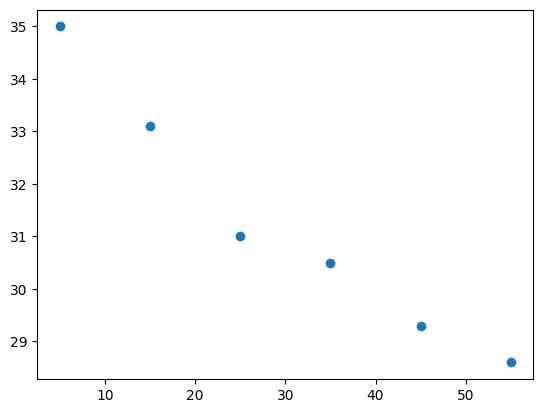

In [24]:
#logaritmic regression

import numpy as np

y=np.array([35,33.1,31,30.5,29.3,28.6])
x=np.array([5,15,25,35,45,55])

import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(x,y)
plt.show()

fit=np.polyfit(np.log(x),y,3
               )


In [25]:
fit

array([ 0.28550402, -2.9942829 ,  7.00382318, 30.30246151])

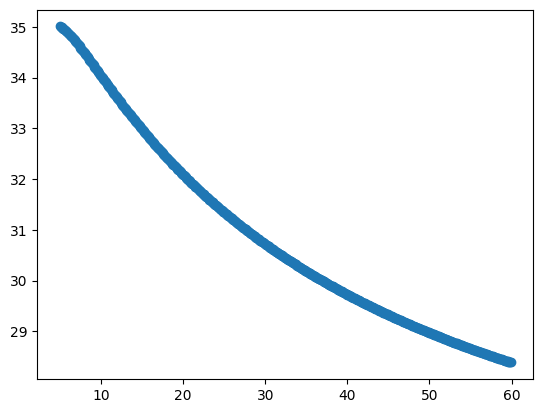

In [28]:
def log(x):
   y= 0.28550402*(np.log(x)**3)-2.9942829 *(np.log(x)**2)+7.00382318*np.log(x)+30.30246151
   return y

x=list(np.arange(5,60,0.1))
y=[]

for i in x:
   y.append(log(i))

plt.scatter(x,y)
plt.show()

In [30]:
y

[35.00885884577553,
 34.99999377535371,
 34.990083123297914,
 34.97920189045865,
 34.967419345399925,
 34.954799536490015,
 34.941401750898635,
 34.92728092677994,
 34.912488024086755,
 34.897070358750874,
 34.88107190435614,
 34.86453356490911,
 34.847493421863575,
 34.82998695816839,
 34.812047261773614,
 34.79370521074045,
 34.77498964184893,
 34.75592750437844,
 34.73654400054539,
 34.71686271391571,
 34.69690572696349,
 34.676693728819586,
 34.65624611414083,
 34.63558107393187,
 34.614715679064005,
 34.59366595715815,
 34.57244696343078,
 34.55107284604104,
 34.52955690642352,
 34.507911655043095,
 34.486148862965976,
 34.464279609602734,
 34.442314326945535,
 34.42026284059099,
 34.3981344078133,
 34.37593775292767,
 34.35368110016227,
 34.331372204237226,
 34.30901837883147,
 34.286626523102285,
 34.26420314640803,
 34.241754391371465,
 34.21928605540936,
 34.196803610843425,
 34.174312223697875,
 34.15181677128044,
 34.12932185863525,
 34.10683183394928,
 34.084350802987075,
 

In [7]:
import json
with open('./Properties_table.json','r',encoding='utf-8') as file:
    properties=json.load(file)

from interpolation import Interp
import pandas as pd

df = pd.DataFrame(properties['air'])

fun=Interp(Xaxis=df['temp'].to_list(),Yaxis=df['conductivity'].to_list())

k=fun.newton_interpol([100])[0]


In [8]:
k

9.34